# Import library

In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.0 MB/s 
     |████████████████████████████████| 5.8 MB 69.6 MB/s 
     |████████████████████████████████| 1.3 MB 65.8 MB/s 
     |████████████████████████████████| 182 kB 77.3 MB/s 
     |████████████████████████████████| 7.6 MB 66.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6a472382398efc26c79c22ca35c587e3d23f20e7f82a7f06d478d5f71033eea2
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#thêm thư viện linear_kernel

# Read data

In [ ]:
new_user = pd.read_csv('USER_DATA_FINAL.csv')
new_job = pd.read_csv('JOB_DATA_FINAL.csv')

In [ ]:
new_job.drop(columns='Unnamed: 0',inplace=True)
new_user.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
data_job.info()

# Bert

## Industry

In [ ]:
X = np.array(data_job['Industry'])

In [ ]:
Y = np.array(data_user['Industry'])

In [ ]:
data_user.head()

,URL User,UserID,User Name,Industry,Desired Job,Workplace Desired,Desired Salary,Gender,Marriage,Target,Skills,Degree,Work Experience,Age,Job_Merge
0,https://timviec365.vn/ung-vien/nguyen-quan-uv9...,964496,nguyễn quân,vận tải lái xe,nhân viên lái xe bằng b2,hà nội,thỏa thuận,nam,đã có gia đình,với kinh nghiệm 10 năm trong lĩnh vực lái xe t...,bằng lái xe hạng c d e và có kinh nghiệm 5 nă...,đơn vị đào tạo trường trung cấp nghề,5,36,nhân viên lái xe bằng b2 thỏa thuận vận tải lá...
1,https://timviec365.vn/ung-vien/nguyen-chau-uv9...,986206,nguyễn châu,vận tải lái xe,nhân viên lái xe bằng d,bình dương,thỏa thuận,nam,đã có gia đình,gắn bó lâu dài với công việc cũng như doanh ng...,có chí tiến thủ đối với công việc có khả năng ...,đơn vị đào tạo trường trung cấp nghề,10,44,nhân viên lái xe bằng d thỏa thuận vận tải lái...
2,https://timviec365.vn/ung-vien/la-thi-hoang-uv...,769632,lã thị hoàng,hành chính văn phòng,nhân viên văn phòng khu công nghiệp sử dụng ti...,bắc giang,thỏa thuận,nữ,độc thân,tìm kiếm một vị trí nhân viên hành chính và m...,am hiểu mọi quy trình về hành chính nhân sự v...,mô tả công việc công ty cổ phần dược phẩm an n...,2,25,nhân viên văn phòng khu công nghiệp sử dụng ti...
3,https://timviec365.vn/ung-vien/nguyen-van-bao-...,981314,nguyễn văn bảo,vận tải lái xe,nhân viên lái xe hạng c,hà nội,thỏa thuận,nam,đã có gia đình,trở thành kỹ sư tốt trong công tác sửa chữa xe...,có khả năng chu toàn công việc siêng năng tỉ m...,đơn vị đào tạo trung tâm dạy nghề,5,33,nhân viên lái xe hạng c thỏa thuận vận tải lái...
4,https://timviec365.vn/ung-vien/nguyen-thi-tu-u...,962892,nguyễn thị tứ,quản lý đơn hàng,nhân viên thu mua,hồ chí minh,thỏa thuận,nữ,độc thân,có một công việc có nhiều cơ hội thăng tiến m...,trung thư c câ n thâ n có óc sáng tạo kỹ năng...,đơn vị đào tạo cao đẳng kinh tế kỹ thuật vinat...,3,24,nhân viên thu mua thỏa thuận quản lý đơn hàng ...


In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_job = model.encode(X,show_progress_bar=True)
print(embeddings_job)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/752 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/767 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/895k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/148 [00:00<?, ?it/s]

[[ 0.53389907 -0.15126461 -0.11073192 ... -0.34063947 -0.19820115
  -0.45493942]
 [ 0.1576      0.26211426 -0.0337861  ... -0.19735263  0.05657074
   0.37793288]
 [ 0.5371628  -0.33433628 -0.25165257 ...  0.19907878 -0.26953742
  -0.05672188]
 ...
 [ 0.6225087  -0.23221876  0.5907238  ... -0.09841564 -0.0148651
  -0.01502485]
 [-0.32146755  0.5834438  -0.2536087  ... -0.31640297  0.02641977
   0.10518025]
 [ 0.33968282  0.04481276  0.04602769 ... -0.31420422 -0.43414342
   0.15426123]]


In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_user = model.encode(Y,show_progress_bar=True)
print(embeddings_user)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

[[ 0.17891358  0.43263736 -0.26967463 ... -0.75986385  0.19529547
   0.00545754]
 [ 0.17891358  0.43263736 -0.26967463 ... -0.75986385  0.19529547
   0.00545754]
 [ 0.5371628  -0.33433628 -0.25165257 ...  0.19907878 -0.26953742
  -0.05672188]
 ...
 [ 0.17891358  0.43263736 -0.26967463 ... -0.75986385  0.19529547
   0.00545754]
 [ 0.17891358  0.43263736 -0.26967463 ... -0.75986385  0.19529547
   0.00545754]
 [ 0.17891358  0.43263736 -0.26967463 ... -0.75986385  0.19529547
   0.00545754]]


In [ ]:
embed_data_job = embeddings_job
embed_data_user = embeddings_user


In [ ]:
X = np.array(embeddings_job)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-0.507684,6.252723,-0.222032,-2.778711,0.679010
1,-3.818605,-1.101813,1.667353,-2.119233,-1.788171
2,2.227026,-0.834036,-2.197236,-0.730567,2.835644
3,-1.552173,1.147207,3.171539,2.337461,-2.465935
4,0.375727,0.915288,-2.109554,0.106768,2.810533


In [ ]:
Y = np.array(embed_data_user)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(Y)
pca_data = pd.DataFrame(pca.transform(Y))
pca_data.head()

,0,1,2,3,4
0,-4.576712,0.113192,0.185166,0.036608,-0.043422
1,-4.576712,0.113192,0.185166,0.036608,-0.043422
2,5.413567,7.017555,0.813685,0.743851,0.071688
3,-4.576712,0.113192,0.185166,0.036608,-0.043422
4,3.428630,-1.437545,-1.869334,2.457871,0.764794


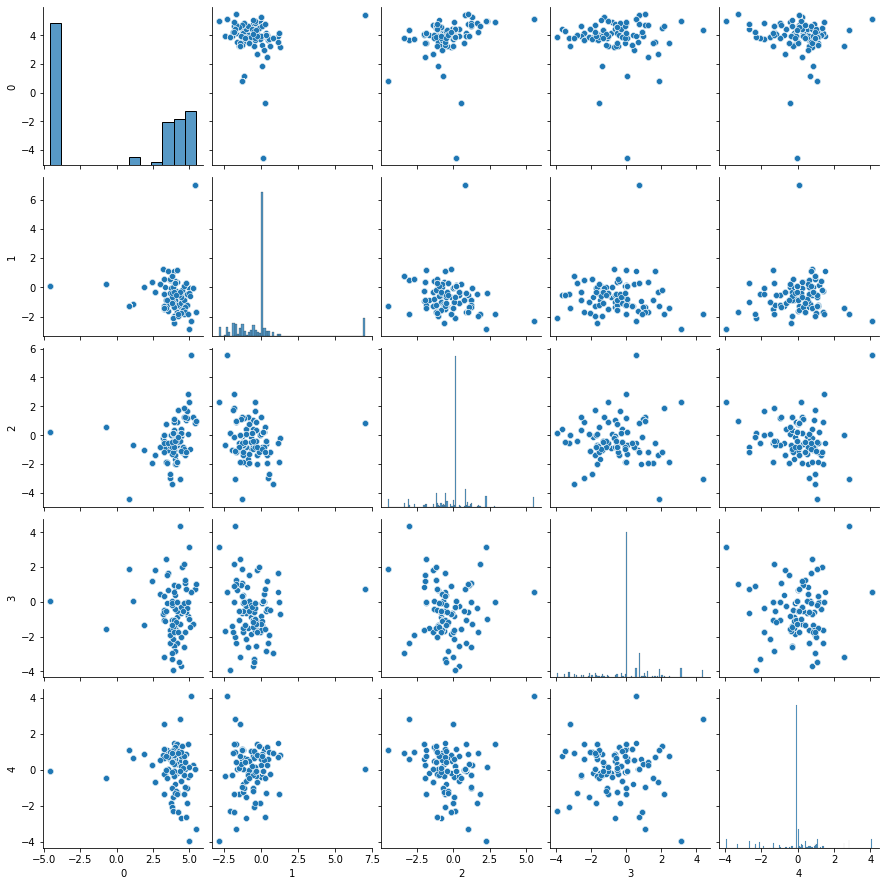

In [ ]:
sns.pairplot(pca_data)

In [ ]:
new_user

,URL User,UserID,User Name,Industry,Desired Job,Workplace Desired,Desired Salary,Gender,Marriage,Target,Skills,Degree,Work Experience,Age,Job_Merge
0,https://timviec365.vn/ung-vien/nguyen-quan-uv9...,964496,nguyễn quân,vận tải lái xe,nhân viên lái xe bằng b2,hà nội,thỏa thuận,nam,đã có gia đình,với kinh nghiệm 10 năm trong lĩnh vực lái xe t...,bằng lái xe hạng c d e và có kinh nghiệm 5 nă...,đơn vị đào tạo trường trung cấp nghề,5,36,nhân viên lái xe bằng b2 thỏa thuận vận tải lá...
1,https://timviec365.vn/ung-vien/nguyen-chau-uv9...,986206,nguyễn châu,vận tải lái xe,nhân viên lái xe bằng d,bình dương,thỏa thuận,nam,đã có gia đình,gắn bó lâu dài với công việc cũng như doanh ng...,có chí tiến thủ đối với công việc có khả năng ...,đơn vị đào tạo trường trung cấp nghề,10,44,nhân viên lái xe bằng d thỏa thuận vận tải lái...
2,https://timviec365.vn/ung-vien/la-thi-hoang-uv...,769632,lã thị hoàng,hành chính văn phòng,nhân viên văn phòng khu công nghiệp sử dụng ti...,bắc giang,thỏa thuận,nữ,độc thân,tìm kiếm một vị trí nhân viên hành chính và m...,am hiểu mọi quy trình về hành chính nhân sự v...,mô tả công việc công ty cổ phần dược phẩm an n...,2,25,nhân viên văn phòng khu công nghiệp sử dụng ti...
3,https://timviec365.vn/ung-vien/nguyen-van-bao-...,981314,nguyễn văn bảo,vận tải lái xe,nhân viên lái xe hạng c,hà nội,thỏa thuận,nam,đã có gia đình,trở thành kỹ sư tốt trong công tác sửa chữa xe...,có khả năng chu toàn công việc siêng năng tỉ m...,đơn vị đào tạo trung tâm dạy nghề,5,33,nhân viên lái xe hạng c thỏa thuận vận tải lái...
4,https://timviec365.vn/ung-vien/nguyen-thi-tu-u...,962892,nguyễn thị tứ,quản lý đơn hàng,nhân viên thu mua,hồ chí minh,thỏa thuận,nữ,độc thân,có một công việc có nhiều cơ hội thăng tiến m...,trung thư c câ n thâ n có óc sáng tạo kỹ năng...,đơn vị đào tạo cao đẳng kinh tế kỹ thuật vinat...,3,24,nhân viên thu mua thỏa thuận quản lý đơn hàng ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,https://timviec365.vn/ung-vien/bui-nghia-uv997...,997433,bùi nghĩa,vận tải lái xe,nhân viên lái xe hạng b2,hà nội,thỏa thuận,nam,đã có gia đình,trở thành nhân viên lái xe cho công ty tôi muố...,tiếp thu tốt các kiến thức lái xe có trí nhớ ...,đơn vị đào tạo trường trung cấp nghề,2,35,nhân viên lái xe hạng b2 thỏa thuận vận tải lá...
3981,https://timviec365.vn/ung-vien/tran-thanh-son-...,964381,trần thanh sơn,vận tải lái xe,nhân viên lái xe hạng c,khánh hòa,thỏa thuận,nam,đã có gia đình,gắn bó lâu dài với công việc cũng như doanh ng...,có chí tiến thủ đối với công việc có khả năng ...,đơn vị đào tạo trung học,5,29,nhân viên lái xe hạng c thỏa thuận vận tải lái...
3982,https://timviec365.vn/ung-vien/huynh-qui-uv969...,969486,huỳnh quí,vận tải lái xe,nhân viên lái xe bằng b2,hồ chí minh,thỏa thuận,nam,độc thân,áp dụng những kiến thức về giao thông vận tải ...,khả năng chịu áp lực cao trong công việc có th...,đơn vị đào tạo trường trung cấp nghề,1,20,nhân viên lái xe bằng b2 thỏa thuận vận tải lá...
3983,https://timviec365.vn/ung-vien/pham-van-truong...,978744,phạm văn trường,vận tải lái xe,nhân viên lái xe bă ng la i xe ha ng d,quảng ninh,thỏa thuận,nam,đã có gia đình,đáp ứng tốt các công việc của công ty giữ gìn ...,giao tiếp tốt thân thiện cởi mở với mọi người ...,đơn vị đào tạo tô t nghiê p thpt,10,34,nhân viên lái xe bă ng la i xe ha ng d thỏa th...


In [ ]:
cosine_sim = linear_kernel(Y,X)

In [ ]:
# # Tạo bộ từ vựng
# job = new_job['Industry'].to_list()
# user = new_user['Industry'].to_list()

# corpus_merge  = job + user
# #print(corpus_merge)
# vectorizers = CountVectorizer()
# Y = vectorizers.fit_transform(corpus_merge)
# Vocabulary = vectorizers.get_feature_names_out()
# # TF- IDF
# a  = new_job
# vectorizer = TfidfVectorizer(max_features= 617,vocabulary= Vocabulary)
# overview_matrix = vectorizer.fit_transform(a['Industry'])
# overview_matrix1 = vectorizer.fit_transform(new_user['Industry'])
# cosine_sim = linear_kernel(overview_matrix1, overview_matrix)

# Hàm tính độ tương đồng và đưa ra khuyến nghị
a  = new_job
def get_recommendations_content_based_with_location_Industry(userid, location, num_hotels):
  list_recommendation_location = []
  list_Job = []
  
  for i in range(len(new_user['UserID'])):
    #if (list_user[i] == userid):
    if (new_user['UserID'][i] == userid):
    # Sắp xếp khách sạn dựa trên điểm số tương tự
      sim_scores = list(enumerate(cosine_sim[i]))

          # Sắp xếp phim dựa trên điểm số tương tự
      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

          # Lấy điểm của 10 phim giống nhất
      sim_scores = sim_scores[1:500]

      job_indices = [i[0] for i in sim_scores]
      list_Job = a['Job Title'].iloc[job_indices].to_list()
      list_JobID = a['JobID'].iloc[job_indices].to_list()
      list_Url = a['URL Job'].iloc[job_indices].to_list()
      list_industry = a['Industry'].iloc[job_indices].to_list()
      list_Salary = a['Salary'].iloc[job_indices].to_list()
      list_Address = a['Job Address'].iloc[job_indices].to_list()

      list_JobDescription = a['Job Description'].iloc[job_indices].to_list()
      list_JobRequirements = a['Job Requirements'].iloc[job_indices].to_list()
      list_Benefits = a['Benefits'].iloc[job_indices].to_list()
      list_YearsofExperience = a['Years of Experience'].iloc[job_indices].to_list()
      list_Gender = a['Gender'].iloc[job_indices].to_list()
  for j in range(len(list_Job)):
    for k in range(new_job.shape[0]):
      if (new_job.iloc[k,0] == list_JobID[j]) & (new_job.iloc[k,6] == location):
        list_recommendation_location.append([list_JobID[j], list_Url[j], list_Job[j], list_JobDescription[j], list_JobRequirements[j],
        list_Benefits[j], list_Address[j], list_Gender[j], list_YearsofExperience[j], list_Salary[j], list_industry[j]])
        break
    if len(list_recommendation_location) == num_hotels:
      break
  name_column = ['JobID',	'URL Job',	'Job Title','Job Description',	'Job Requirements',	'Benefits',	'Job Address',	'Gender',	'Years of Experience',	'Salary',	'Industry']
  df = pd.DataFrame(data = list_recommendation_location, columns=name_column )
  return df#list_recommendation_location

In [ ]:
df_Industry = get_recommendations_content_based_with_location_Industry(986657,'hồ chí minh',50)
df_Industry.to_csv('/content/drive/MyDrive/Final Project/Result/Result_bert/Result_Industry_986657.csv',index= False)
df_Industry

,JobID,URL Job,Job Title,Job Description,Job Requirements,Benefits,Job Address,Gender,Years of Experience,Salary,Industry
0,1601,https://timviec365.vn/designer-nhan-vien-thiet...,designer nhân viên thiết kế,lên ý tưởng triển khai các phương án thiết kế ...,tốt nghiệp cao đẳng đại học trở lên các ngành ...,- Được làm việc trong một công ty hàng đầu về ...,hồ chí minh,không yêu cầu,1,7 - 10 triệu,it phần mềm
1,2143,https://timviec365.vn/phudonggroup-chuyen-vien...,phudonggroup chuyên viên it,làm việc tại trụ sở quận 1 địa chỉ 55 trần nhậ...,tốt nghiệp cao đẳng đại học chuyên ngành có li...,- Thu nhập : 10tr đến 15tr - Hưởng các chế độ ...,hồ chí minh,không yêu cầu,2,Từ 10.000.000 VNĐ Đến 15.000.000 VNĐ,it phần mềm
2,3600,https://timviec365.vn/cong-ty-tnhh-tu-van-thuo...,công ty tnhh tư vấn thương mại khánh linh tuyể...,lập trình phát triển các dự án của công ty phầ...,bằng cấp tối thiểu cử nhân cntt hoặc tương đươ...,: - Lương/thưởng: thỏa thuận Các chế độ đãi ng...,hồ chí minh,không yêu cầu,1,5 - 7 triệu,it phần mềm
3,3614,https://timviec365.vn/tuyen-dung-lap-trinh-vie...,tuyển dụng lập trình viên it,thiết kế web app chạy marketing online,không,"Thưởng theo dự án, tiến độ",hồ chí minh,nam,1,10 - 15 triệu,it phần mềm
4,753,https://timviec365.vn/ky-su-phan-mem-p825150.html,kỹ sư phần mềm,nhận source của công ty đọc source code và dep...,có khả năng cài đặt có kiến thức về reverse en...,Lương: 800$_1500$/tháng (Có thể deal cao hơn t...,hồ chí minh,không yêu cầu,1,Từ 800 USD Đến 1.500 USD,kỹ sư phần mềm
5,1757,https://timviec365.vn/chuyen-vien-trien-khai-d...,chuyên viên triển khai dự án erp,khảo sát thu thập yêu cầu dự án phân tích hệ t...,trình độ tốt nghiệp cao đẳng đại học liên quan...,"TRAU DỒI KIẾN THỨC: Dựa trên năng lực cá nhân,...",hồ chí minh,nam,2,Từ 15.000.000 VNĐ Đến 25.000.000 VNĐ,nhân viên triển khai phần mềm
6,1911,https://timviec365.vn/senior-software-develope...,senior software developer,tham gia nghiên cứu xây dựng vận hành ứng dụng...,tốt nghiệp đại học cao đẳng chuyên ngành cntt ...,- Chính sách thưởng theo thành tích đóng góp -...,hồ chí minh,nam,1,Từ 15.000.000 VNĐ Đến 20.000.000 VNĐ,nhân viên triển khai phần mềm
7,2177,https://timviec365.vn/thuc-tap-sinh-it-trien-k...,thực tập sinh it triển khai phần mềm,hỗ trợ khảo sát nghiệp vụ người dùng hỗ trợ đà...,độ tuổi từ 21 24 sinh viên năm cuối hoặc tốt n...,"-\tLàm việc trong môi trường chuyên nghiệp, sá...",hồ chí minh,nam,0,Đến 2.000.000 VNĐ,nhân viên triển khai phần mềm
8,2344,https://timviec365.vn/nhan-vien-kinh-doanh-thu...,nhân viên kinh doanh thực tập,ctcp công nghệ logsik tuyển dụng nhân viên kin...,yêu cầu ứng viên với ứng viên chưa có kinh ngh...,- Lương cứng + hoa hồng - Được nhận làm nhân v...,hồ chí minh,nữ,0,1 - 3 triệu,nhân viên triển khai phần mềm
9,3056,https://timviec365.vn/angular-developer-p84593...,angular developer,responsibilities using languages such as html ...,at least 06 months experience with angular app...,Be entitled to all basic benefits as governmen...,hồ chí minh,không yêu cầu,1,Từ 10.000.000 VNĐ Đến 20.000.000 VNĐ,nhân viên triển khai phần mềm


## Desired Job

In [ ]:
X = np.array(data_job['Job Title'])

In [ ]:
Y = np.array(data_user['Desired Job'])

In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_job = model.encode(X,show_progress_bar=True)
print(embeddings_job)

Batches:   0%|          | 0/148 [00:00<?, ?it/s]

[[ 0.32893443 -0.07341839 -0.19100724 ... -0.22424628 -0.19915791
  -0.2320668 ]
 [ 0.3824658   0.20157257 -0.23392938 ... -0.1058236   0.03215618
   0.3434699 ]
 [-0.49432006  0.16096078 -0.4987299  ...  0.02853328 -0.05043172
  -0.488335  ]
 ...
 [ 0.17428902 -0.3299062  -0.3335502  ...  0.03868053 -0.22520672
   0.19849262]
 [-0.5666663   0.03614059 -0.19277672 ... -0.23900656  0.14166243
   0.22781327]
 [ 0.5255746  -0.14836606 -0.07351054 ... -0.16596062 -0.30378035
   0.1311457 ]]


In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_user = model.encode(Y,show_progress_bar=True)
print(embeddings_user)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

[[ 0.08132745  0.5108082  -0.492168   ... -0.3271339   0.07981063
   0.24581122]
 [-0.10149083  0.3190585  -0.3875898  ... -0.6692984   0.12013679
   0.7005552 ]
 [ 0.31783587  0.64039993 -0.17489836 ... -0.15016884 -0.57868737
  -0.21164379]
 ...
 [ 0.08132745  0.5108082  -0.492168   ... -0.3271339   0.07981063
   0.24581122]
 [-0.22612032  0.16967696 -0.23256677 ... -0.43924147 -0.07247861
   0.12689357]
 [ 0.08132745  0.5108082  -0.492168   ... -0.3271339   0.07981063
   0.24581122]]


In [ ]:
embed_data_job = embeddings_job
embed_data_user = embeddings_user


In [ ]:
X = np.array(embeddings_job)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-0.501247,-2.003001,2.010549,-0.124675,2.995574
1,3.712014,-1.479218,-1.868964,0.330431,0.214943
2,-1.582434,3.079329,-0.277216,-0.574618,1.123274
3,-0.717439,-2.331766,-1.314468,-0.041495,0.119862
4,-0.575236,-0.640217,2.676719,-0.454492,-2.425191


In [ ]:
Y = np.array(embed_data_user)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(Y)
pca_data = pd.DataFrame(pca.transform(Y))
pca_data.head()

,0,1,2,3,4
0,-3.627268,1.815731,4.296630,0.788194,0.739379
1,-3.502829,-0.031235,-0.333450,1.914936,1.575108
2,3.239150,1.503230,-1.334216,-1.965812,-1.147319
3,-3.976361,-2.909412,-1.097135,-0.891055,-0.294501
4,4.721933,-1.538963,1.374346,1.327558,-1.544417


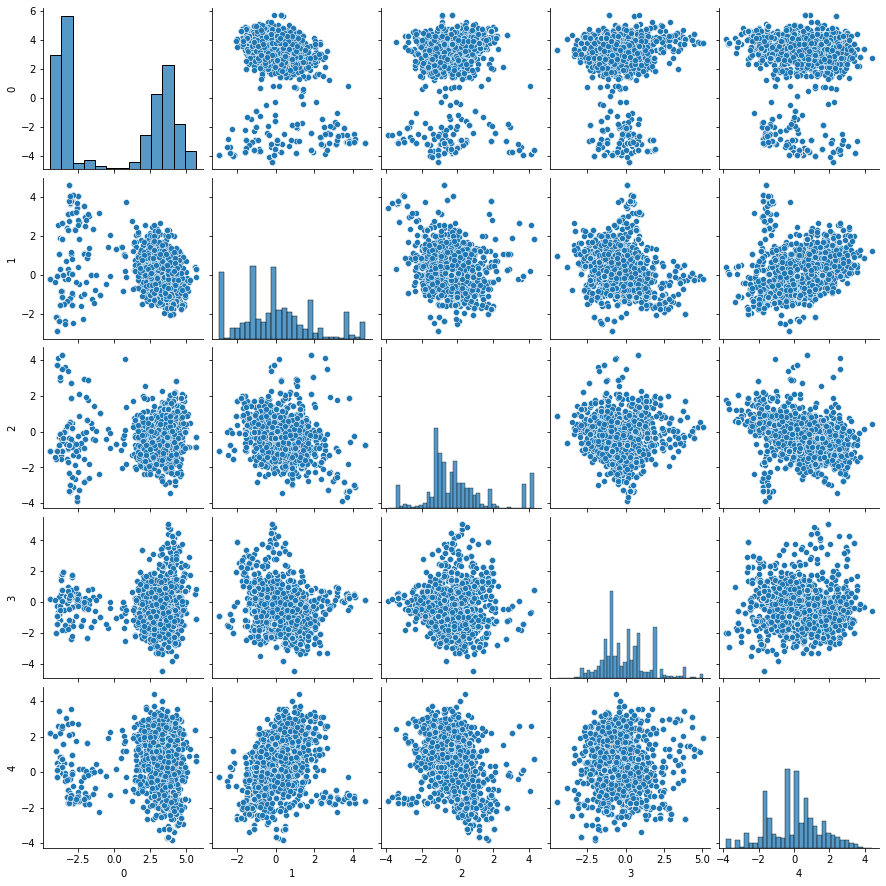

In [ ]:
sns.pairplot(pca_data)

In [ ]:
cosine_sim = linear_kernel(Y,X)

In [ ]:
# # Tạo bộ từ vựng
# job = new_job['Industry'].to_list()
# user = new_user['Industry'].to_list()

# corpus_merge  = job + user
# #print(corpus_merge)
# vectorizers = CountVectorizer()
# Y = vectorizers.fit_transform(corpus_merge)
# Vocabulary = vectorizers.get_feature_names_out()
# # TF- IDF
# a  = new_job
# vectorizer = TfidfVectorizer(max_features= 617,vocabulary= Vocabulary)
# overview_matrix = vectorizer.fit_transform(a['Industry'])
# overview_matrix1 = vectorizer.fit_transform(new_user['Industry'])
# cosine_sim = linear_kernel(overview_matrix1, overview_matrix)

# Hàm tính độ tương đồng và đưa ra khuyến nghị
a  = new_job
def get_recommendations_content_based_with_location_DesiredJob(userid, location, num_hotels):
  list_recommendation_location = []
  list_Job = []
  
  for i in range(len(new_user['UserID'])):
    #if (list_user[i] == userid):
    if (new_user['UserID'][i] == userid):
    # Sắp xếp khách sạn dựa trên điểm số tương tự
      sim_scores = list(enumerate(cosine_sim[i]))

          # Sắp xếp phim dựa trên điểm số tương tự
      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

          # Lấy điểm của 10 phim giống nhất
      sim_scores = sim_scores[1:500]

      job_indices = [i[0] for i in sim_scores]
      list_Job = a['Job Title'].iloc[job_indices].to_list()
      list_JobID = a['JobID'].iloc[job_indices].to_list()
      list_Url = a['URL Job'].iloc[job_indices].to_list()
      list_industry = a['Industry'].iloc[job_indices].to_list()
      list_Salary = a['Salary'].iloc[job_indices].to_list()
      list_Address = a['Job Address'].iloc[job_indices].to_list()

      list_JobDescription = a['Job Description'].iloc[job_indices].to_list()
      list_JobRequirements = a['Job Requirements'].iloc[job_indices].to_list()
      list_Benefits = a['Benefits'].iloc[job_indices].to_list()
      list_YearsofExperience = a['Years of Experience'].iloc[job_indices].to_list()
      list_Gender = a['Gender'].iloc[job_indices].to_list()
  for j in range(len(list_Job)):
    for k in range(new_job.shape[0]):
      if (new_job.iloc[k,0] == list_JobID[j]) & (new_job.iloc[k,6] == location):
        list_recommendation_location.append([list_JobID[j], list_Url[j], list_Job[j], list_JobDescription[j], list_JobRequirements[j],
        list_Benefits[j], list_Address[j], list_Gender[j], list_YearsofExperience[j], list_Salary[j], list_industry[j]])
        break
    if len(list_recommendation_location) == num_hotels:
      break
  name_column = ['JobID',	'URL Job',	'Job Title','Job Description',	'Job Requirements',	'Benefits',	'Job Address',	'Gender',	'Years of Experience',	'Salary',	'Industry']
  df = pd.DataFrame(data = list_recommendation_location, columns=name_column )
  return df#list_recommendation_location

In [ ]:
df_DesiredJob = get_recommendations_content_based_with_location_DesiredJob(986657,'hồ chí minh',50)
df_DesiredJob.to_csv('/content/drive/MyDrive/Final Project/Result/Result_bert/Result_DesiredJob_986657.csv',index= False)
df_DesiredJob

,JobID,URL Job,Job Title,Job Description,Job Requirements,Benefits,Job Address,Gender,Years of Experience,Salary,Industry
0,3928,https://timviec365.vn/thuc-tap-sinh-it-p825099...,thực tập sinh it,hỗ trợ và phối hợp nhân viên it xử lý các vấn ...,thời gian làm việc full time 8h 18h từ t2 đến ...,- Được hỗ trợ lương thực tập 100k/ ngày + 25k ...,hồ chí minh,không yêu cầu,0,Thỏa thuận,kỹ thuật viên máy tính
1,4382,https://timviec365.vn/thuc-tap-sinh-content-p8...,thực tập sinh content,viết bài seo và biên tập các nội dung khác the...,sinh viên tất cả các chuyên ngành ưu tiên chuy...,•\tPhụ cấp xăng xe/ ăn trưa + thưởng •\tHỗ trợ...,hồ chí minh,không yêu cầu,0,1 - 3 triệu,thực tập sinh tài chính doanh nghiệp
2,4542,https://timviec365.vn/thuc-tap-sinh-p843521.html,thực tập sinh,gọi điện thoại làm văn phòng không quy định se...,không yêu cầu kinh nghiệm được huấn luyện đào ...,"hỗ trợ tiền điện thoại , thời gian làm việc li...",hồ chí minh,không yêu cầu,0,Thỏa thuận,cộng tác viên bán bảo hiểm
3,4013,https://timviec365.vn/thuc-tap-sinh-qc-tester-...,thực tập sinh qc tester,1 tổ chức thực hiện kiểm thử sản phẩm 2 chịu t...,sinh viên năm cuối hoặc sinh viên vừa tốt nghi...,1. Phụ cấp thực tập: 1.000.000 - 2.000.000/ th...,hồ chí minh,không yêu cầu,0,Thỏa thuận,lập trình viên html css
4,377,https://timviec365.vn/nhan-vien-trien-khai-pha...,nhân viên triển khai phần mềm,1 gặp gỡ khách hàng nhà thuốc cty phân phối để...,1 trình độ học vấn cao đẳng trở lên 2 có kiến ...,1.\tĐánh giá tăng lương mỗi năm một lần. Mức t...,hồ chí minh,nữ,1,Từ 7.000.000 VNĐ Đến 9.000.000 VNĐ,nhân viên chăm sóc khách hàng
5,61,https://timviec365.vn/tuyen-thuc-tap-sinh-it-p...,tuyển thực tập sinh it,1 xử lý sự cố máy tính về phần mềm cũng như ph...,1 có kỹ năng và năng lực chuyên môn 2 có kiến ...,1. Phụ cấp: 1.000.000 VNĐ/ tháng 2. Nghỉ thứ 7...,hồ chí minh,không yêu cầu,0,Thỏa thuận,thực tập sinh it
6,2191,https://timviec365.vn/thuc-tap-sinh-thiet-ke-h...,thực tập sinh thiết kế hcm,thiết kế offline standee banner backdrop bandr...,sử dụng cơ bản các phần mềm thiết kế adobe pho...,"- Hỗ trợ dấu thực tập, lương + thưởng nếu làm ...",hồ chí minh,không yêu cầu,0,Thỏa thuận,thiết kế đồ họa
7,469,https://timviec365.vn/thuc-tap-sinh-marketing-...,thực tập sinh marketing,quảng bá sản phẩm website đến khách hàng thu h...,không ngại giao tiếp hòa đồng vui vẻ chịu khó ...,- Sau 3 tháng thực tập công ty sẽ xác nhận dấu...,hồ chí minh,không yêu cầu,0,Thỏa thuận,marketing executive
8,2676,https://timviec365.vn/thuc-tap-sinh-nhan-su-hr...,thực tập sinh nhân sự hr,đăng tin tuyển dụng lên các trang web và các g...,yêu cầu nho nhỏ có laptop cá nhân để làm việc ...,⚡ Quyền lợi khi bạn trở thành thành viên: - Đư...,hồ chí minh,không yêu cầu,0,Thỏa thuận,sinh viên thực tập nhân sự
9,3666,https://timviec365.vn/thuc-tap-sinh-nhan-su-th...,thực tập sinh nhân sự thực tập sinh marketing ...,1 thực tập sinh nhân sự jd tiếp nhận nhu cầu t...,năng động sáng tạo có trách nhiệm với công việ...,"Được đào tạo, phát triển chuyên môn, nhân sự v...",hồ chí minh,không yêu cầu,0,Thỏa thuận,content marketing


## Skills

In [ ]:
X = np.array(data_job['Job Requirements'])

In [ ]:
Y = np.array(data_user['Skills'])

In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_job = model.encode(X,show_progress_bar=True)
print(embeddings_job)

Batches:   0%|          | 0/148 [00:00<?, ?it/s]

[[-0.03959758  0.39370117 -0.20209196 ...  0.08940735 -0.23490849
   0.20729792]
 [-0.11623229  0.19604017 -0.14061698 ...  0.10694236 -0.1196131
  -0.36744353]
 [ 0.28142795  0.21452367  0.23119853 ...  0.07340115 -0.43521175
  -0.04847395]
 ...
 [ 0.21407647  0.6857954   0.23137204 ...  0.0328943   0.00694441
  -0.0768315 ]
 [-0.08194552  0.31827623 -0.04758522 ...  0.01143378 -0.2828136
   0.25407043]
 [ 0.11835074  0.2502887   0.05649105 ... -0.03246813 -0.02132607
  -0.11386435]]


In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_user = model.encode(Y,show_progress_bar=True)
print(embeddings_user)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

[[ 0.08613426  0.3635978   0.30723402 ...  0.13905437  0.14395764
   0.20340419]
 [ 0.07895867  0.06382602  0.11294028 ...  0.35521013  0.08844463
  -0.1911169 ]
 [ 0.02878932  0.07911409  0.01524263 ...  0.18066287 -0.26121944
  -0.05858257]
 ...
 [-0.07431722  0.25969163 -0.01253507 ... -0.03057593 -0.0180938
   0.03284743]
 [ 0.04927749  0.01705914  0.10903666 ...  0.0464513  -0.13602214
  -0.04789719]
 [ 0.33408892  0.40874228  0.23126006 ...  0.0071204   0.22251797
  -0.10334872]]


In [ ]:
embed_data_job = embeddings_job
embed_data_user = embeddings_user


In [ ]:
X = np.array(embeddings_job)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,1.652835,-1.472931,-0.824293,0.545571,-0.895587
1,-1.551810,0.045226,-1.773718,0.446971,-0.986361
2,0.481036,3.397097,0.850171,-2.058120,0.501997
3,-0.676555,-0.687215,-0.971718,-0.839965,-0.316511
4,-2.508590,0.339859,-0.890032,0.703119,0.528377


In [ ]:
Y = np.array(embed_data_user)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(Y)
pca_data = pd.DataFrame(pca.transform(Y))
pca_data.head()

,0,1,2,3,4
0,3.015396,-0.902149,-0.485345,-0.064743,-0.492011
1,0.041155,0.164879,0.862367,2.739988,-0.346081
2,-1.016782,0.054542,0.611819,0.738330,-0.738470
3,1.880809,-0.016466,-1.089898,-0.264209,1.791851
4,-2.244087,-1.036316,-0.334192,-0.582202,0.725875


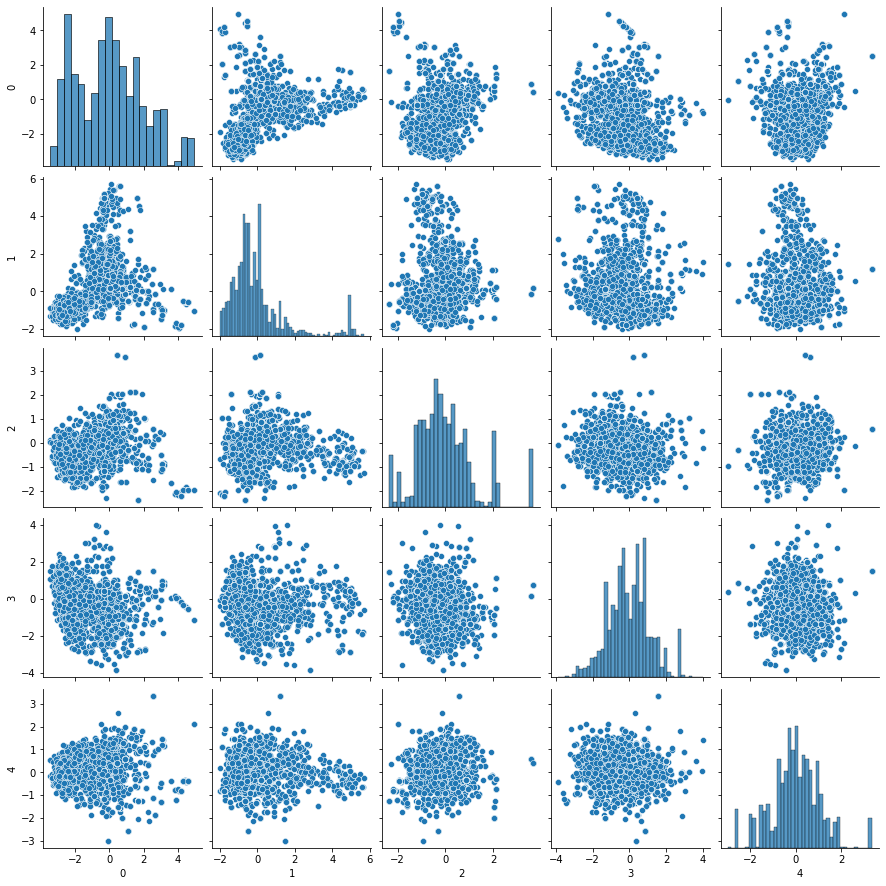

In [ ]:
sns.pairplot(pca_data)

In [ ]:
cosine_sim = linear_kernel(Y,X)

In [ ]:
# # Tạo bộ từ vựng
# job = new_job['Industry'].to_list()
# user = new_user['Industry'].to_list()

# corpus_merge  = job + user
# #print(corpus_merge)
# vectorizers = CountVectorizer()
# Y = vectorizers.fit_transform(corpus_merge)
# Vocabulary = vectorizers.get_feature_names_out()
# # TF- IDF
# a  = new_job
# vectorizer = TfidfVectorizer(max_features= 617,vocabulary= Vocabulary)
# overview_matrix = vectorizer.fit_transform(a['Industry'])
# overview_matrix1 = vectorizer.fit_transform(new_user['Industry'])
# cosine_sim = linear_kernel(overview_matrix1, overview_matrix)

# Hàm tính độ tương đồng và đưa ra khuyến nghị
a  = new_job
def get_recommendations_content_based_with_location_Skills(userid, location, num_hotels):
  list_recommendation_location = []
  list_Job = []
  
  for i in range(len(new_user['UserID'])):
    #if (list_user[i] == userid):
    if (new_user['UserID'][i] == userid):
    # Sắp xếp khách sạn dựa trên điểm số tương tự
      sim_scores = list(enumerate(cosine_sim[i]))

          # Sắp xếp phim dựa trên điểm số tương tự
      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

          # Lấy điểm của 10 phim giống nhất
      sim_scores = sim_scores[1:500]

      job_indices = [i[0] for i in sim_scores]
      list_Job = a['Job Title'].iloc[job_indices].to_list()
      list_JobID = a['JobID'].iloc[job_indices].to_list()
      list_Url = a['URL Job'].iloc[job_indices].to_list()
      list_industry = a['Industry'].iloc[job_indices].to_list()
      list_Salary = a['Salary'].iloc[job_indices].to_list()
      list_Address = a['Job Address'].iloc[job_indices].to_list()

      list_JobDescription = a['Job Description'].iloc[job_indices].to_list()
      list_JobRequirements = a['Job Requirements'].iloc[job_indices].to_list()
      list_Benefits = a['Benefits'].iloc[job_indices].to_list()
      list_YearsofExperience = a['Years of Experience'].iloc[job_indices].to_list()
      list_Gender = a['Gender'].iloc[job_indices].to_list()
  for j in range(len(list_Job)):
    for k in range(new_job.shape[0]):
      if (new_job.iloc[k,0] == list_JobID[j]) & (new_job.iloc[k,6] == location):
        list_recommendation_location.append([list_JobID[j], list_Url[j], list_Job[j], list_JobDescription[j], list_JobRequirements[j],
        list_Benefits[j], list_Address[j], list_Gender[j], list_YearsofExperience[j], list_Salary[j], list_industry[j]])
        break
    if len(list_recommendation_location) == num_hotels:
      break
  name_column = ['JobID',	'URL Job',	'Job Title','Job Description',	'Job Requirements',	'Benefits',	'Job Address',	'Gender',	'Years of Experience',	'Salary',	'Industry']
  df = pd.DataFrame(data = list_recommendation_location, columns=name_column )
  return df#list_recommendation_location

In [ ]:
df_Skills = get_recommendations_content_based_with_location_Skills(986657,'hồ chí minh',50)
df_Skills.to_csv('/content/drive/MyDrive/Final Project/Result/Result_bert/Result_Skills_986657.csv',index= False)
df_Skills

,JobID,URL Job,Job Title,Job Description,Job Requirements,Benefits,Job Address,Gender,Years of Experience,Salary,Industry
0,4118,https://timviec365.vn/ke-toan-ban-hang-p811050...,kế toán bán hàng,kiểm tra hóa đơn nhập hàng từ nhà sản xuất xử ...,tinh thần trách nhiệm cao làm việc chủ động ho...,- Hưởng lương tháng 13 + thưởng theo năng lực ...,hồ chí minh,nữ,1,Thỏa thuận,kế toán bán hàng
1,4676,https://timviec365.vn/nhan-vien-bao-tri-nganh-...,nhân viên bảo trì ngành nhuộm,định kỳ thực hiện việc lập kế hoạch bảo trì bả...,làm việc trách nhiệm độc lập chịu áp lực công ...,-\tĐược hưởng mức lương xứng đáng theo năng lự...,hồ chí minh,nam,1,Thỏa thuận,nhân viên bảo trì
2,1960,https://timviec365.vn/cham-soc-khach-hang-p840...,chăm sóc khách hàng,gọi điện dựa trên data có bài tư vấn có sẵn ch...,yêu cầu ứng viên 22t trở lêngiao tiếp hiệu quả...,Quyền lợi Mức thu nhập 7-15 triệuMôi trường là...,hồ chí minh,không yêu cầu,1,10 - 15 triệu,nhân viên chăm sóc khách hàng
3,3823,https://timviec365.vn/q12-tuyen-03-tts-kinh-do...,q12 tuyển 03 tts kinh doanh fulltime hỗ trợ mộ...,hỗ trợ tìm kiếm thông tin tiếp cận khách hàng ...,trình độ cao đẳng trở lên chuyên cần cẩn thận ...,"• Hỗ trợ thu nhập, mộc dấu • Môi trường làm vi...",hồ chí minh,không yêu cầu,0,Thỏa thuận,nhân viên hỗ trợ kinh doanh
4,2253,https://timviec365.vn/truong-nhom-kinh-doanh-p...,trưởng nhóm kinh doanh,quản lý đội nhóm từ 4 8 nhân sự hỗ trợ theo dõ...,tốt nghiệp từ cao đẳng trở lên đã từng làm quả...,Video / ảnh giới thiệu,hồ chí minh,không yêu cầu,1,Từ 12.000.000 VNĐ,nhân viên tư vấn tài chính
5,3441,https://timviec365.vn/nhan-vien-xuat-nhap-khau...,nhân viên xuất nhập khẩu,làm việc thương lượng với các nhà cung cấp nướ...,sử dụng thành thạo vi tính văn phòng và các ph...,- Lương thỏa thuận theo năng lực trao đổi trực...,hồ chí minh,không yêu cầu,1,Thỏa thuận,nhân viên xuất nhập khẩu
6,1292,https://timviec365.vn/nhan-vien-ban-hang-thi-t...,nhân viên bán hàng thị trường,_ phát triển khách hàng mới trong địa bàn được...,ưu tiên ứng viên có kinh nghiệm làm kinh doanh...,Video / ảnh giới thiệu,hồ chí minh,không yêu cầu,0,Từ 10.000.000 VNĐ Đến 20.000.000 VNĐ,nhân viên kinh doanh văn phòng phẩm
7,2345,https://timviec365.vn/hanh-chinh-nhan-su-p8416...,hành chính nhân sự,thực hiện các công việc hành chính văn phòng c...,thành thạo tin học văn phòng word excel có kỹ ...,- Mức lương thỏa thuận theo năng lực; thưởng c...,hồ chí minh,không yêu cầu,1,Thỏa thuận,hành chính văn phòng nhân sự
8,1100,https://timviec365.vn/nhan-vien-kho-p835089.html,nhân viên kho,tham gia trực tiếp vào các hoạt động của bộ ph...,tốt nghiệp thpt có tinh thần trách nhiệm cao t...,"• Mức lương: Thỏa thuận • Chế độ khen thưởng, ...",hồ chí minh,không yêu cầu,1,Từ 5.000.000 VNĐ Đến 10.000.000 VNĐ,công nhân làm giờ hành chính
9,3770,https://timviec365.vn/truong-nhom-truong-pho-p...,trưởng nhóm trưởng phó phòng thiết kế quản lý ...,nhiệm vụ chính quản lý công tác xây dựng và ph...,tối thiểu 05 năm kinh nghiệm vị trí tương đươn...,- Lương cơ bản (thỏa thuận) : từ 30.000.000 - ...,hồ chí minh,không yêu cầu,5,Từ 30.000.000 VNĐ Đến 65.000.000 VNĐ,quản trị thương hiệu


## Job title + Industry + Salary + Gender

In [ ]:
X = np.array(data_job['Job_Merge'])

In [ ]:
Y = np.array(data_user['Job_Merge'])

In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_job = model.encode(X,show_progress_bar=True)
print(embeddings_job)

Batches:   0%|          | 0/148 [00:00<?, ?it/s]

[[ 0.11053865  0.21560048 -0.22366443 ...  0.1134776  -0.25373468
   0.01176217]
 [-0.05871129  0.25650457 -0.15873073 ...  0.06138189 -0.23125054
  -0.19080974]
 [-0.11440076  0.28976288 -0.4932799  ... -0.01328414 -0.3707851
  -0.17088604]
 ...
 [ 0.34377527  0.6016055   0.08878502 ...  0.02798501 -0.08330414
  -0.00543799]
 [-0.23025338  0.2993996  -0.18874007 ... -0.01108461 -0.37161165
   0.30586717]
 [ 0.23253974  0.24412782  0.12268925 ...  0.00988724 -0.07825325
  -0.09620794]]


In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')
embeddings_user = model.encode(Y,show_progress_bar=True)
print(embeddings_user)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

[[ 7.3306777e-02  3.0665809e-01  1.8593232e-01 ...  1.7672341e-01
   8.6651608e-02  1.9001636e-01]
 [ 5.8064684e-02  1.7962773e-01  1.4071782e-01 ...  2.4717157e-01
   9.6062392e-02 -1.4334732e-01]
 [ 6.8026990e-02  1.3348004e-01 -9.4597928e-02 ...  2.2123678e-01
  -2.6048216e-01 -5.9575707e-02]
 ...
 [-5.2468747e-02  2.2242773e-01 -4.9765322e-02 ...  6.9062662e-04
  -2.3336176e-02 -3.9674412e-04]
 [ 2.4578851e-03  7.8609832e-02  1.1100762e-01 ...  9.3416326e-02
  -1.0129223e-01 -6.3676089e-02]
 [ 2.4008682e-01  5.5271685e-01  1.6106048e-01 ... -1.8242769e-02
   2.1368830e-01 -9.9044055e-02]]


In [ ]:
embed_data_job = embeddings_job
embed_data_user = embeddings_user


In [ ]:
X = np.array(embeddings_job)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-1.160626,-0.491089,-1.188321,0.111938,0.558385
1,1.619909,-1.339605,0.653073,-0.649167,-0.156042
2,-1.892679,0.636719,4.535379,-0.595642,1.321384
3,0.808111,-0.614844,1.353585,-1.571672,0.666776
4,1.714641,1.499130,0.292462,-0.602626,-0.337123


In [ ]:
Y = np.array(embed_data_user)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(Y)
pca_data = pd.DataFrame(pca.transform(Y))
pca_data.head()

,0,1,2,3,4
0,2.983325,-0.030865,-0.036042,0.513235,-0.464489
1,1.127177,-0.019247,1.615013,-0.977466,-1.063294
2,-1.653953,0.200900,0.444773,-0.028917,-0.798362
3,1.751623,0.309515,0.151827,-0.475245,1.465891
4,-2.172829,-1.061020,-0.276884,-0.248358,0.049131


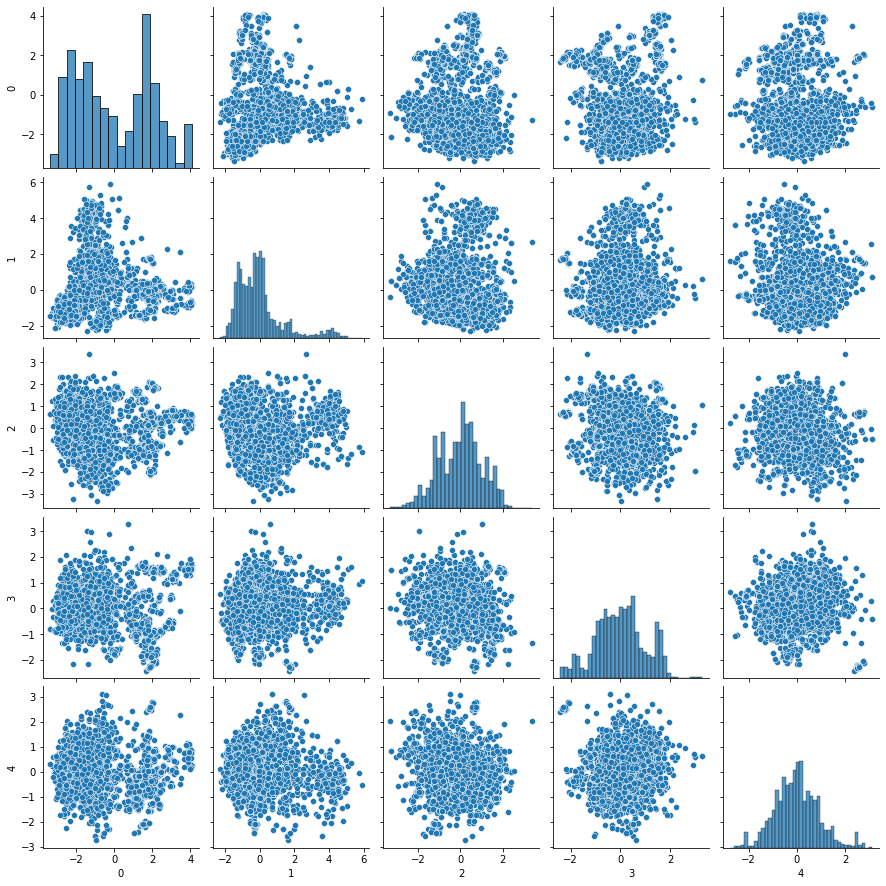

In [ ]:
sns.pairplot(pca_data)

In [ ]:
cosine_sim = linear_kernel(Y,X)

In [ ]:
# # Tạo bộ từ vựng
# job = new_job['Industry'].to_list()
# user = new_user['Industry'].to_list()

# corpus_merge  = job + user
# #print(corpus_merge)
# vectorizers = CountVectorizer()
# Y = vectorizers.fit_transform(corpus_merge)
# Vocabulary = vectorizers.get_feature_names_out()
# # TF- IDF
# a  = new_job
# vectorizer = TfidfVectorizer(max_features= 617,vocabulary= Vocabulary)
# overview_matrix = vectorizer.fit_transform(a['Industry'])
# overview_matrix1 = vectorizer.fit_transform(new_user['Industry'])
# cosine_sim = linear_kernel(overview_matrix1, overview_matrix)

# Hàm tính độ tương đồng và đưa ra khuyến nghị
a  = new_job
def get_recommendations_content_based_with_location_Job_Merge(userid, location, num_hotels):
  list_recommendation_location = []
  list_Job = []
  
  for i in range(len(new_user['UserID'])):
    #if (list_user[i] == userid):
    if (new_user['UserID'][i] == userid):
    # Sắp xếp khách sạn dựa trên điểm số tương tự
      sim_scores = list(enumerate(cosine_sim[i]))

          # Sắp xếp phim dựa trên điểm số tương tự
      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

          # Lấy điểm của 10 phim giống nhất
      sim_scores = sim_scores[1:500]

      job_indices = [i[0] for i in sim_scores]
      list_Job = a['Job Title'].iloc[job_indices].to_list()
      list_JobID = a['JobID'].iloc[job_indices].to_list()
      list_Url = a['URL Job'].iloc[job_indices].to_list()
      list_industry = a['Industry'].iloc[job_indices].to_list()
      list_Salary = a['Salary'].iloc[job_indices].to_list()
      list_Address = a['Job Address'].iloc[job_indices].to_list()

      list_JobDescription = a['Job Description'].iloc[job_indices].to_list()
      list_JobRequirements = a['Job Requirements'].iloc[job_indices].to_list()
      list_Benefits = a['Benefits'].iloc[job_indices].to_list()
      list_YearsofExperience = a['Years of Experience'].iloc[job_indices].to_list()
      list_Gender = a['Gender'].iloc[job_indices].to_list()
  for j in range(len(list_Job)):
    for k in range(new_job.shape[0]):
      if (new_job.iloc[k,0] == list_JobID[j]) & (new_job.iloc[k,6] == location):
        list_recommendation_location.append([list_JobID[j], list_Url[j], list_Job[j], list_JobDescription[j], list_JobRequirements[j],
        list_Benefits[j], list_Address[j], list_Gender[j], list_YearsofExperience[j], list_Salary[j], list_industry[j]])
        break
    if len(list_recommendation_location) == num_hotels:
      break
  name_column = ['JobID',	'URL Job',	'Job Title','Job Description',	'Job Requirements',	'Benefits',	'Job Address',	'Gender',	'Years of Experience',	'Salary',	'Industry']
  df = pd.DataFrame(data = list_recommendation_location, columns=name_column )
  return df#list_recommendation_location

In [ ]:
df_Job_Merge = get_recommendations_content_based_with_location_Skills(986657,'hồ chí minh',50)
df_Job_Merge.to_csv('/content/drive/MyDrive/Final Project/Result/Result_bert/Result_Job_Merge_986657.csv',index= False)
df_Job_Merge

,JobID,URL Job,Job Title,Job Description,Job Requirements,Benefits,Job Address,Gender,Years of Experience,Salary,Industry
0,4118,https://timviec365.vn/ke-toan-ban-hang-p811050...,kế toán bán hàng,kiểm tra hóa đơn nhập hàng từ nhà sản xuất xử ...,tinh thần trách nhiệm cao làm việc chủ động ho...,- Hưởng lương tháng 13 + thưởng theo năng lực ...,hồ chí minh,nữ,1,Thỏa thuận,kế toán bán hàng
1,3441,https://timviec365.vn/nhan-vien-xuat-nhap-khau...,nhân viên xuất nhập khẩu,làm việc thương lượng với các nhà cung cấp nướ...,sử dụng thành thạo vi tính văn phòng và các ph...,- Lương thỏa thuận theo năng lực trao đổi trực...,hồ chí minh,không yêu cầu,1,Thỏa thuận,nhân viên xuất nhập khẩu
2,1001,https://timviec365.vn/chuyen-vien-tuyen-dung-p...,chuyên viên tuyển dụng,tuyển dụng và đào tạo chuẩn bị và thực hiện cô...,năng động nhiệt tình và trách nhiệm sử dụng th...,"1. Chế độ lương, thưởng - Mức lương: 8 triệu/t...",hồ chí minh,không yêu cầu,1,Thỏa thuận,chuyên viên nhân sự
3,2345,https://timviec365.vn/hanh-chinh-nhan-su-p8416...,hành chính nhân sự,thực hiện các công việc hành chính văn phòng c...,thành thạo tin học văn phòng word excel có kỹ ...,- Mức lương thỏa thuận theo năng lực; thưởng c...,hồ chí minh,không yêu cầu,1,Thỏa thuận,hành chính văn phòng nhân sự
4,2951,https://timviec365.vn/nhan-vien-kinh-doanh-cha...,nhân viên kinh doanh chăm sóc phòng phân phối,chuyên chăm sóc các đại lý các nhà phân phốich...,1 kinh nghiệm làm việc được đào tạo nếu chưa c...,- Chính sách lương hấp dẫn: + Lương cứng cố đị...,hồ chí minh,không yêu cầu,0,Thỏa thuận,chuyên viên kinh doanh
5,3770,https://timviec365.vn/truong-nhom-truong-pho-p...,trưởng nhóm trưởng phó phòng thiết kế quản lý ...,nhiệm vụ chính quản lý công tác xây dựng và ph...,tối thiểu 05 năm kinh nghiệm vị trí tương đươn...,- Lương cơ bản (thỏa thuận) : từ 30.000.000 - ...,hồ chí minh,không yêu cầu,5,Từ 30.000.000 VNĐ Đến 65.000.000 VNĐ,quản trị thương hiệu
6,156,https://timviec365.vn/tuyen-dung-nhan-vien-ky-...,tuyển dụng nhân viên kỹ thuật lắp ráp,sử dụng các công cụ kỹ thuật trạm hàn kính hiể...,thị lực tốt bao gồm khả năng cảm nhận chiều sâ...,"Lương thỏa thuận theo kinh nghiệm, tối thiểu 6...",hồ chí minh,nam,1,Thỏa thuận,kỹ thuật viên sản xuất
7,2233,https://timviec365.vn/nhan-vien-giao-dich-admi...,nhân viên giao dịch admin,tiếp nhận và xử lý các đơn hàng của khách hàng...,tốt nghiệp cao đẳng trở lên sử dụng thành thạo...,- Mức lương từ 7 – 12 triệu đồng và gồm các kh...,hồ chí minh,không yêu cầu,1,Thỏa thuận,admin văn phòng
8,4676,https://timviec365.vn/nhan-vien-bao-tri-nganh-...,nhân viên bảo trì ngành nhuộm,định kỳ thực hiện việc lập kế hoạch bảo trì bả...,làm việc trách nhiệm độc lập chịu áp lực công ...,-\tĐược hưởng mức lương xứng đáng theo năng lự...,hồ chí minh,nam,1,Thỏa thuận,nhân viên bảo trì
9,3373,https://timviec365.vn/nhan-vien-kinh-doanh-nha...,nhân viên kinh doanh nhà sách,chuyên chăm sóc các đại lý các nhà phân phốich...,1 kinh nghiệm làm việc được đào tạo nếu chưa c...,- Chính sách lương hấp dẫn: + Lương cứng cố đị...,hồ chí minh,không yêu cầu,0,Thỏa thuận,chuyên viên kinh doanh
